# PyWGCNA with E-MEXP-1304

In [7]:
import PyWGCNA

## Setting up the data and preprocessing
Starting with the transposed dataset related to the top 2000 most deviating genes calculated by MAD

In [8]:
geneExp = "../data/E-MEXP-1304-Complete/eMEXP1304AllConditions-prepocessed-filtered-transposed.csv"
PyWGCNA_1304_All = PyWGCNA.WGCNA(name='E-MEXP-1304-All',
                                  species='arabidopsis thaliana',
                                  geneExpPath=geneExp,
                                  outputPath='/home/ribei027/wgcna/analysis_notebooks',
                                  save=True,
                                 TPMcutoff=5)
PyWGCNA_1304_All.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


,AT2G42530,AT3G21720,AT5G04120,AT1G01060,AT2G47780,AT2G42540,AT5G54190,AT3G02380,AT2G25510,AT5G62360,...,ATCG00770,AT1G26665,AT3G15110,AT4G29140,AT3G13062,AT3G46700,AT2G15880,AT4G34220,AT1G25560,AT3G10280
col_0_DD_DDHC,2.613532,12.964978,10.836327,8.278403,11.463785,4.139961,11.595183,5.916715,3.116032,2.244887,...,3.232661,7.924694,5.093391,7.018923,4.609400,3.883621,3.030336,6.142005,7.146696,2.414136
col_4_DD_DDHC,3.028569,12.857577,10.931661,7.700370,11.382710,3.023255,12.145741,4.495695,2.550901,1.906891,...,6.187451,7.916238,6.205549,5.702381,4.800123,5.022812,2.427606,5.533875,8.169825,2.411426
col_8_DD_DDHC,2.771886,13.006824,11.772187,2.364572,11.477596,2.711495,12.393742,2.893362,2.503349,1.996389,...,4.425594,9.027243,6.229588,5.786074,5.636045,4.196922,2.592158,5.311067,8.587853,3.301588
col_12_DD_DDHC,3.263034,13.122721,11.925328,1.992768,11.339633,2.456806,11.655857,2.761285,2.555816,2.207893,...,6.089371,9.199623,5.572890,6.100767,5.672991,5.182295,2.761285,5.633141,8.970278,2.472488
col_16_DD_DDHC,2.673556,13.283826,12.184993,2.684819,11.636498,2.987321,12.209173,3.168321,2.641546,2.319040,...,5.173927,9.451891,6.716031,5.747656,6.412273,4.090007,3.010780,6.289097,9.478446,3.114367


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



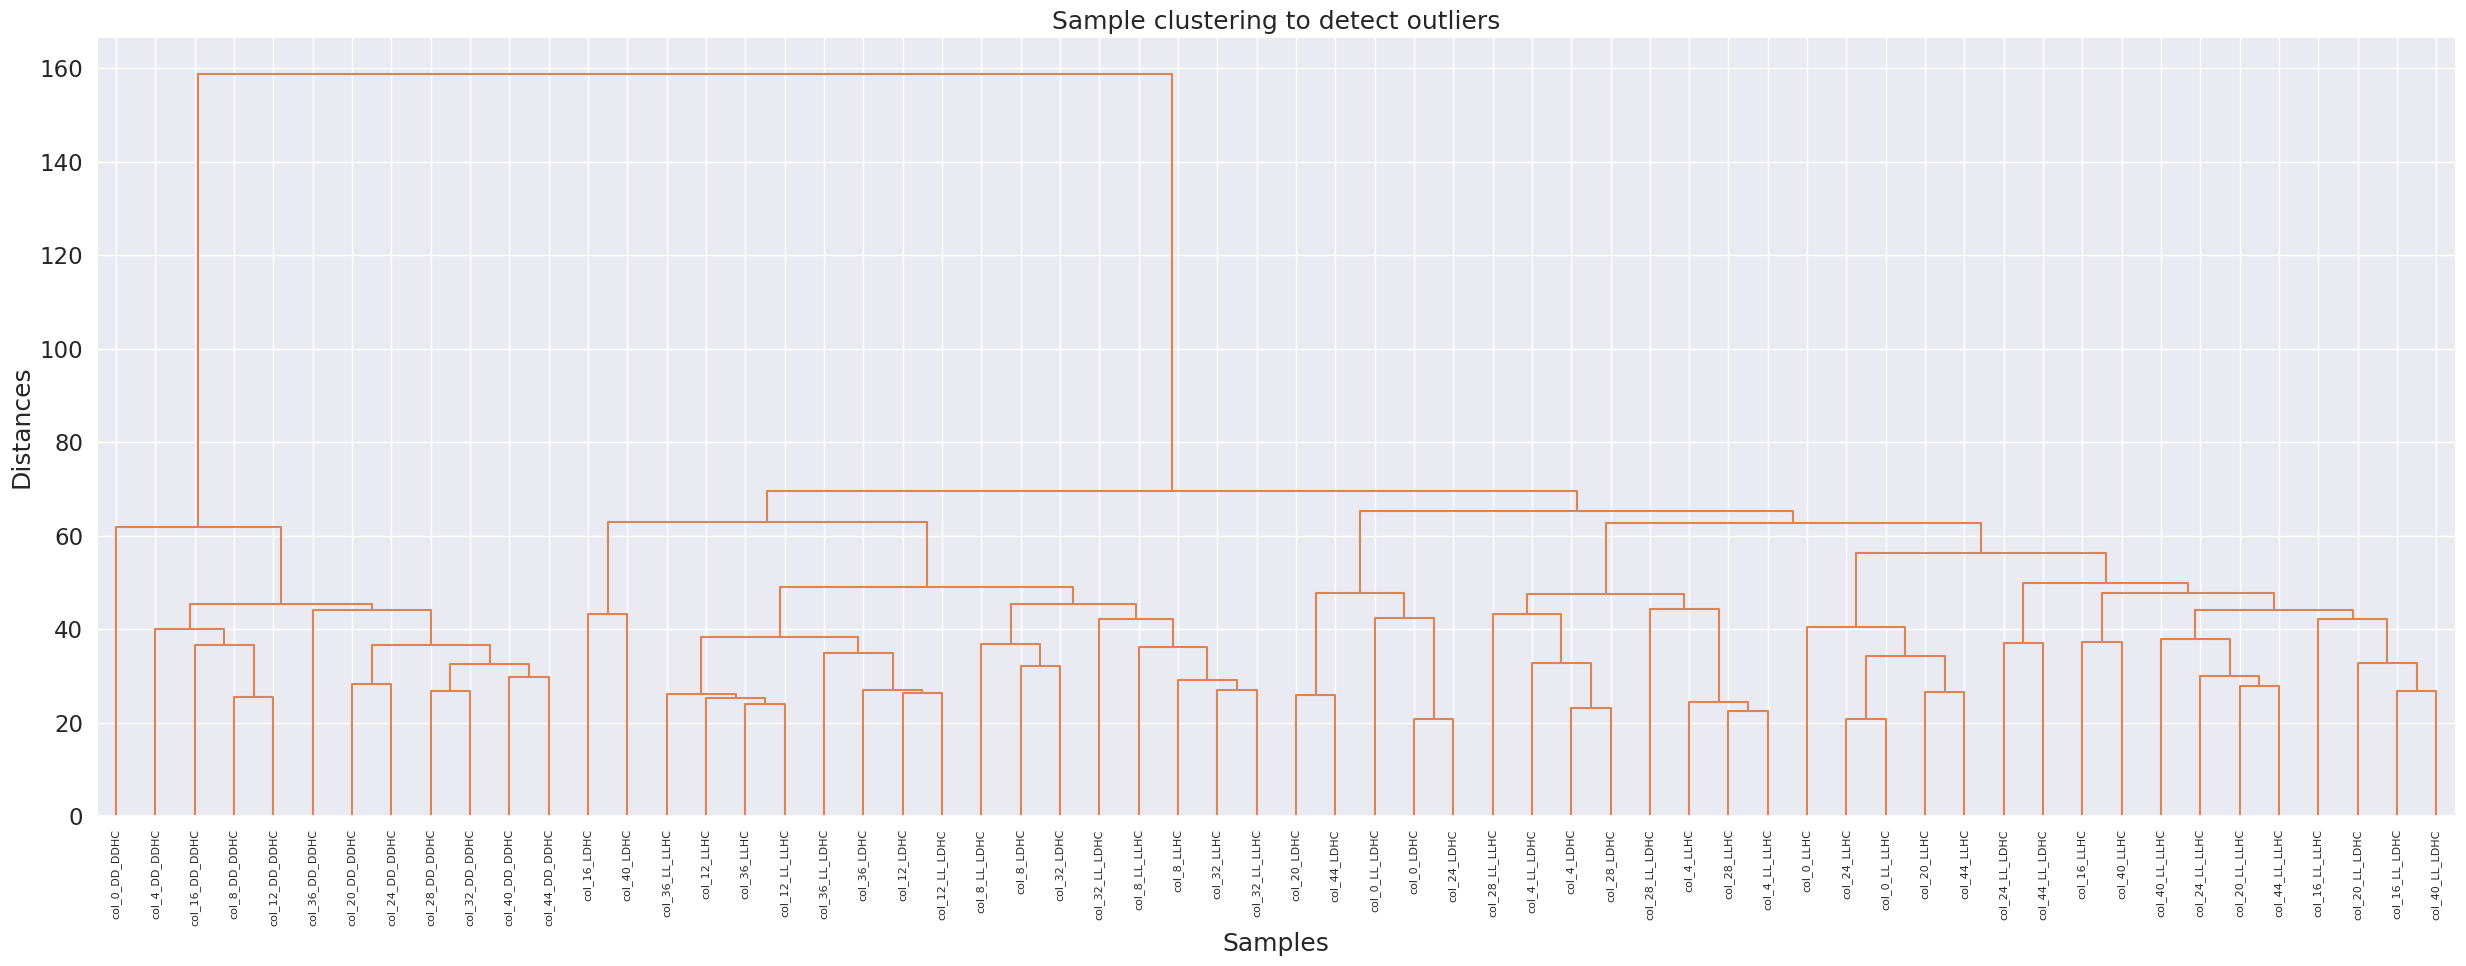

In [9]:
PyWGCNA_1304_All.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2000
    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.826142   1.74339       0.874847  600.613171  668.211113   
1       2  0.591829  0.645294       0.814622  431.903184  495.040799   
2       3  0.205099  0.237602       0.556125  333.518742  381.906683   
3       4  0.000213  0.006574       0.058115  267.969996  301.879152   
4       5  0.094399 -0.140576      -0.031661  220.962366  242.695493   
5       6  0.232873 -0.257433       0.050261   185.62242  197.388145   
6       7  0.366172 -0.357327       0.185092  158.160684  161.500066   
7       8  0.433574 -0.435265       0.290969  136.289182  133.566228   
8       9   0.49811 -0.507579       0.397475  118.533656  110.795275   
9      10  0.567528 -0.559698       0.509228  103.896506   93.464029   
10     11  0.597415 -0.612378       0.572684   91.676409   78.504463   
11     13  0.683808 -0.682715    

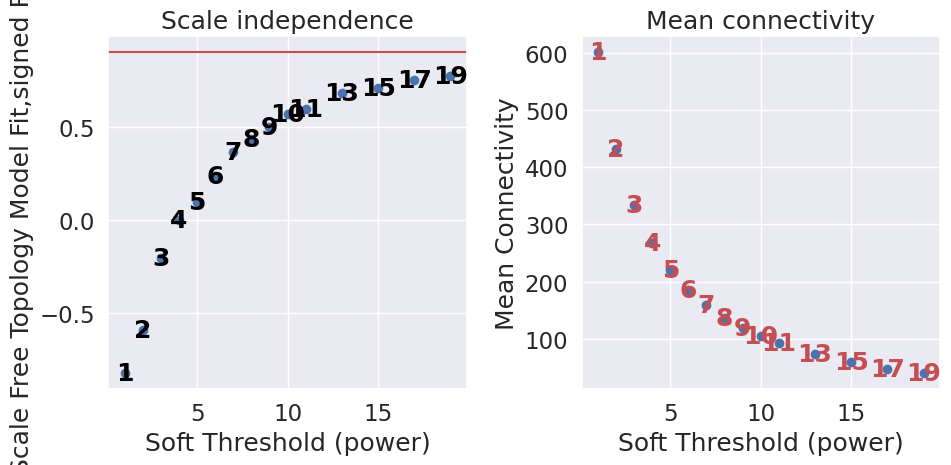

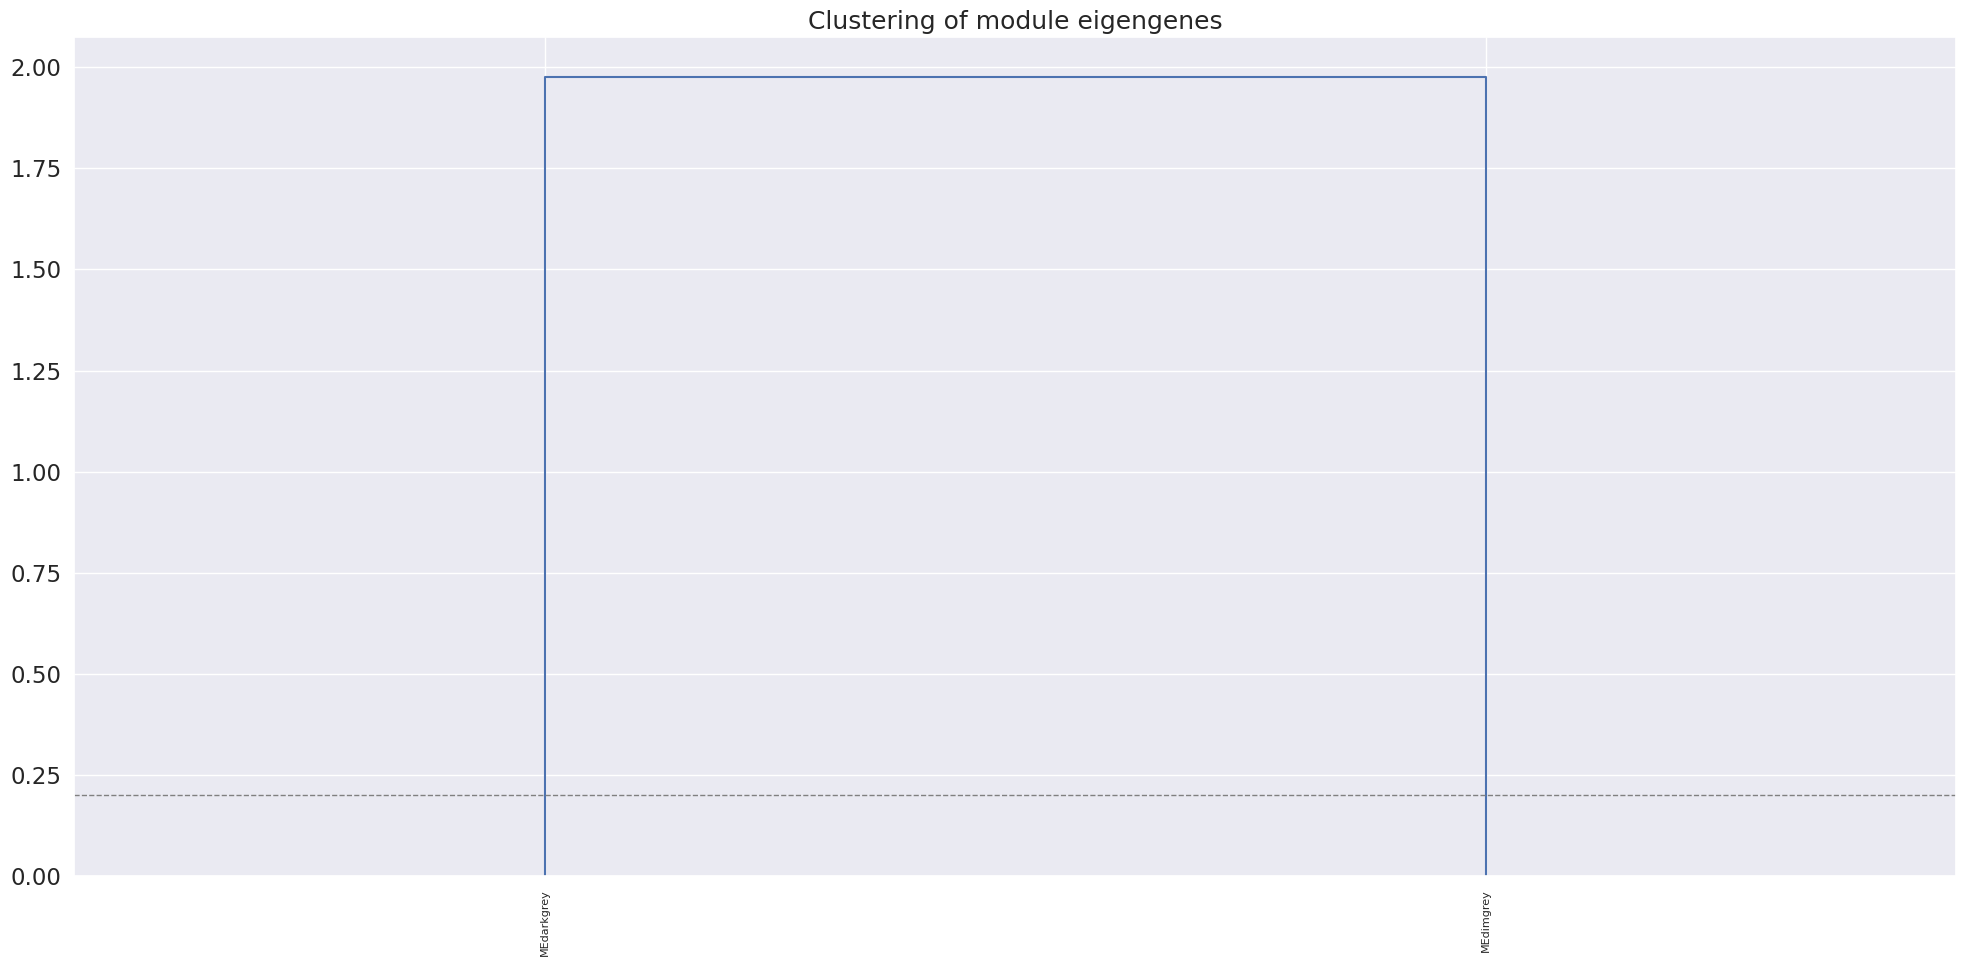

In [10]:
PyWGCNA_1304_All.findModules()

## Update metadata

In [11]:
PyWGCNA_1304_All.updateSampleInfo(path='../data/E-MEXP-1304-Complete/eMEXP1304AllConditionsSampleInfo.csv', sep=',')

# Add color to metadata

PyWGCNA_1304_All.setMetadataColor('Temperature', {'12': 'blue',
                                              '22': 'yellow'})

PyWGCNA_1304_All.setMetadataColor('Age', {'7days': 'red',
                                          '8days': 'plum',
                                          '9days': 'deppink',})

PyWGCNA_1304_All.setMetadataColor('Light', {'Light': 'yellow',
                                             'Dark': 'purple'})

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...


KeyError: 'Tissue'

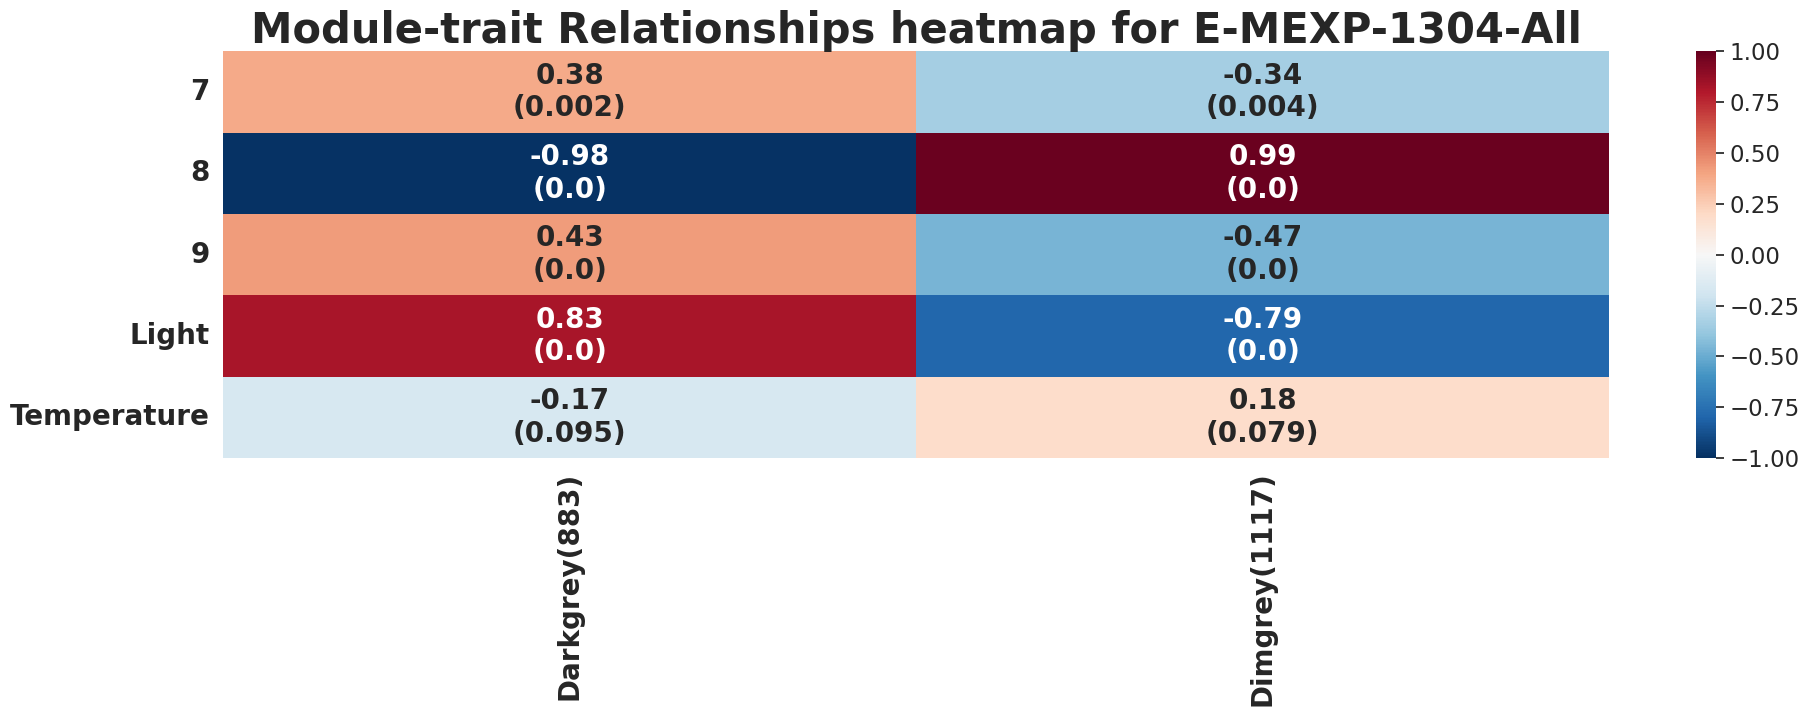

In [12]:
PyWGCNA_1304_All.analyseWGCNA()

# Functional Enrichment Analysis

In [7]:
PyWGCNA_1304_All.saveWGCNA()

Saving WGCNA as E-MEXP-1304-All.p


In [8]:
PyWGCNA_1304_All = PyWGCNA.readWGCNA("E-MEXP-1304.p")

Reading E-MEXP-1304 WGCNA done!


In [10]:
geneList = PyWGCNA.getGeneList(dataset='athaliana_eg_gene',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])

In [11]:
PyWGCNA_1304_All.updateGeneInfo(geneList)

In [12]:
PyWGCNA_1304_All.figureType = "png"
gene_set_library = ["GO_Biological_Process_2021", "GO_Cellular_Component_2021", "GO_Molecular_Function_2021"]
PyWGCNA_1304_All.functional_enrichment_analysis(type="GO",
                                             moduleName="dimgrey",
                                             sets=gene_set_library,
                                             p_value=0.05,
                                             file_name="GO_Dimgrey_2021")

No enrich terms when cutoff = 0.05 in module dimgrey
